This problem uses data from two data sets, the Berkeley Guidance Study and a UN study on Fertility rates for 193 countries. These data sets are available in Doc Sharing.  

Please submit responses to the following questions, including plots and analysis, to the Week 2.

The data from the Berkeley Guidance study resides in one file HW2_BGALL in both SAS and *.csv format. In this study, the coding for gender is: 0 = males, 1= females
1. Generate a scatter-plot matrix of all continuous variables. Group the variables by gender, so that each paired observation has a gender-associated label. Explain the relationships that you see. Generate two linear regressions that predict WT18 (weight at 18 years old) . One regression model is to predict the weight for boys and the other to predict the weight for girls. Interpret the results. (25 pts)
2. Generate a multiple linear regression model to explain WT 18 using the variables HT2, WT2, HT9, WT9 and ST9. Find the R-squared, the overall ANOVA table and overall F-test. Compute the t-statistics  to test each of the coefficients against to be 0. State the conclusions from this test. (25 pts)

The data for the UN study on fertility is in HW_UN for both *csv and sas format.  It contains data on income, GDP and fertility rates for 193 nations. It also contains log transforms for both variables.

3. Generate two scatter-plots of PPgdp vs Fertility – one using linear scaling for both variables and  the other using log scaling for both variables. (10 pts)
4. Perform regressions using both log and linear transformations of the data. Note: I have transform (20 pts)
5. Which regression exhibits a better fit (log or linear)? Use  the ANOVA summary support your reasoning. (20 pts)

Click on the "Week Two Assignment" link above to submit your assignment, as well as to get more information regarding the due date and grading rubric. 

## Question 1

In [47]:
import pandas as pd
import seaborn as sns

df1 = pd.read_csv("/Users/RyanPaw/ANA620/HW2_BGALL.csv")
df2 = pd.read_csv("/Users/RyanPaw/ANA620/HW2_UN.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     136 non-null    int64  
 1   WT2     136 non-null    float64
 2   HT2     136 non-null    float64
 3   WT9     136 non-null    float64
 4   HT9     136 non-null    float64
 5   LG9     136 non-null    float64
 6   ST9     136 non-null    int64  
 7   WT18    136 non-null    float64
 8   HT18    136 non-null    float64
 9   LG18    136 non-null    float64
 10  ST18    136 non-null    int64  
 11  Soma    136 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 12.9 KB


In [4]:
df1.head()

,Sex,WT2,HT2,WT9,HT9,LG9,ST9,WT18,HT18,LG18,ST18,Soma
0,0,13.6,90.2,41.5,139.4,31.6,74,110.2,179.0,44.1,226,7.0
1,0,12.7,91.4,31.0,144.3,26.0,73,79.4,195.1,36.1,252,4.0
2,0,12.6,86.4,30.1,136.5,26.6,64,76.3,183.7,36.9,216,6.0
3,0,14.8,87.6,34.1,135.4,28.2,75,74.5,178.7,37.3,220,2.0
4,0,12.7,86.7,24.5,128.9,24.2,63,55.7,171.5,31.0,200,1.5


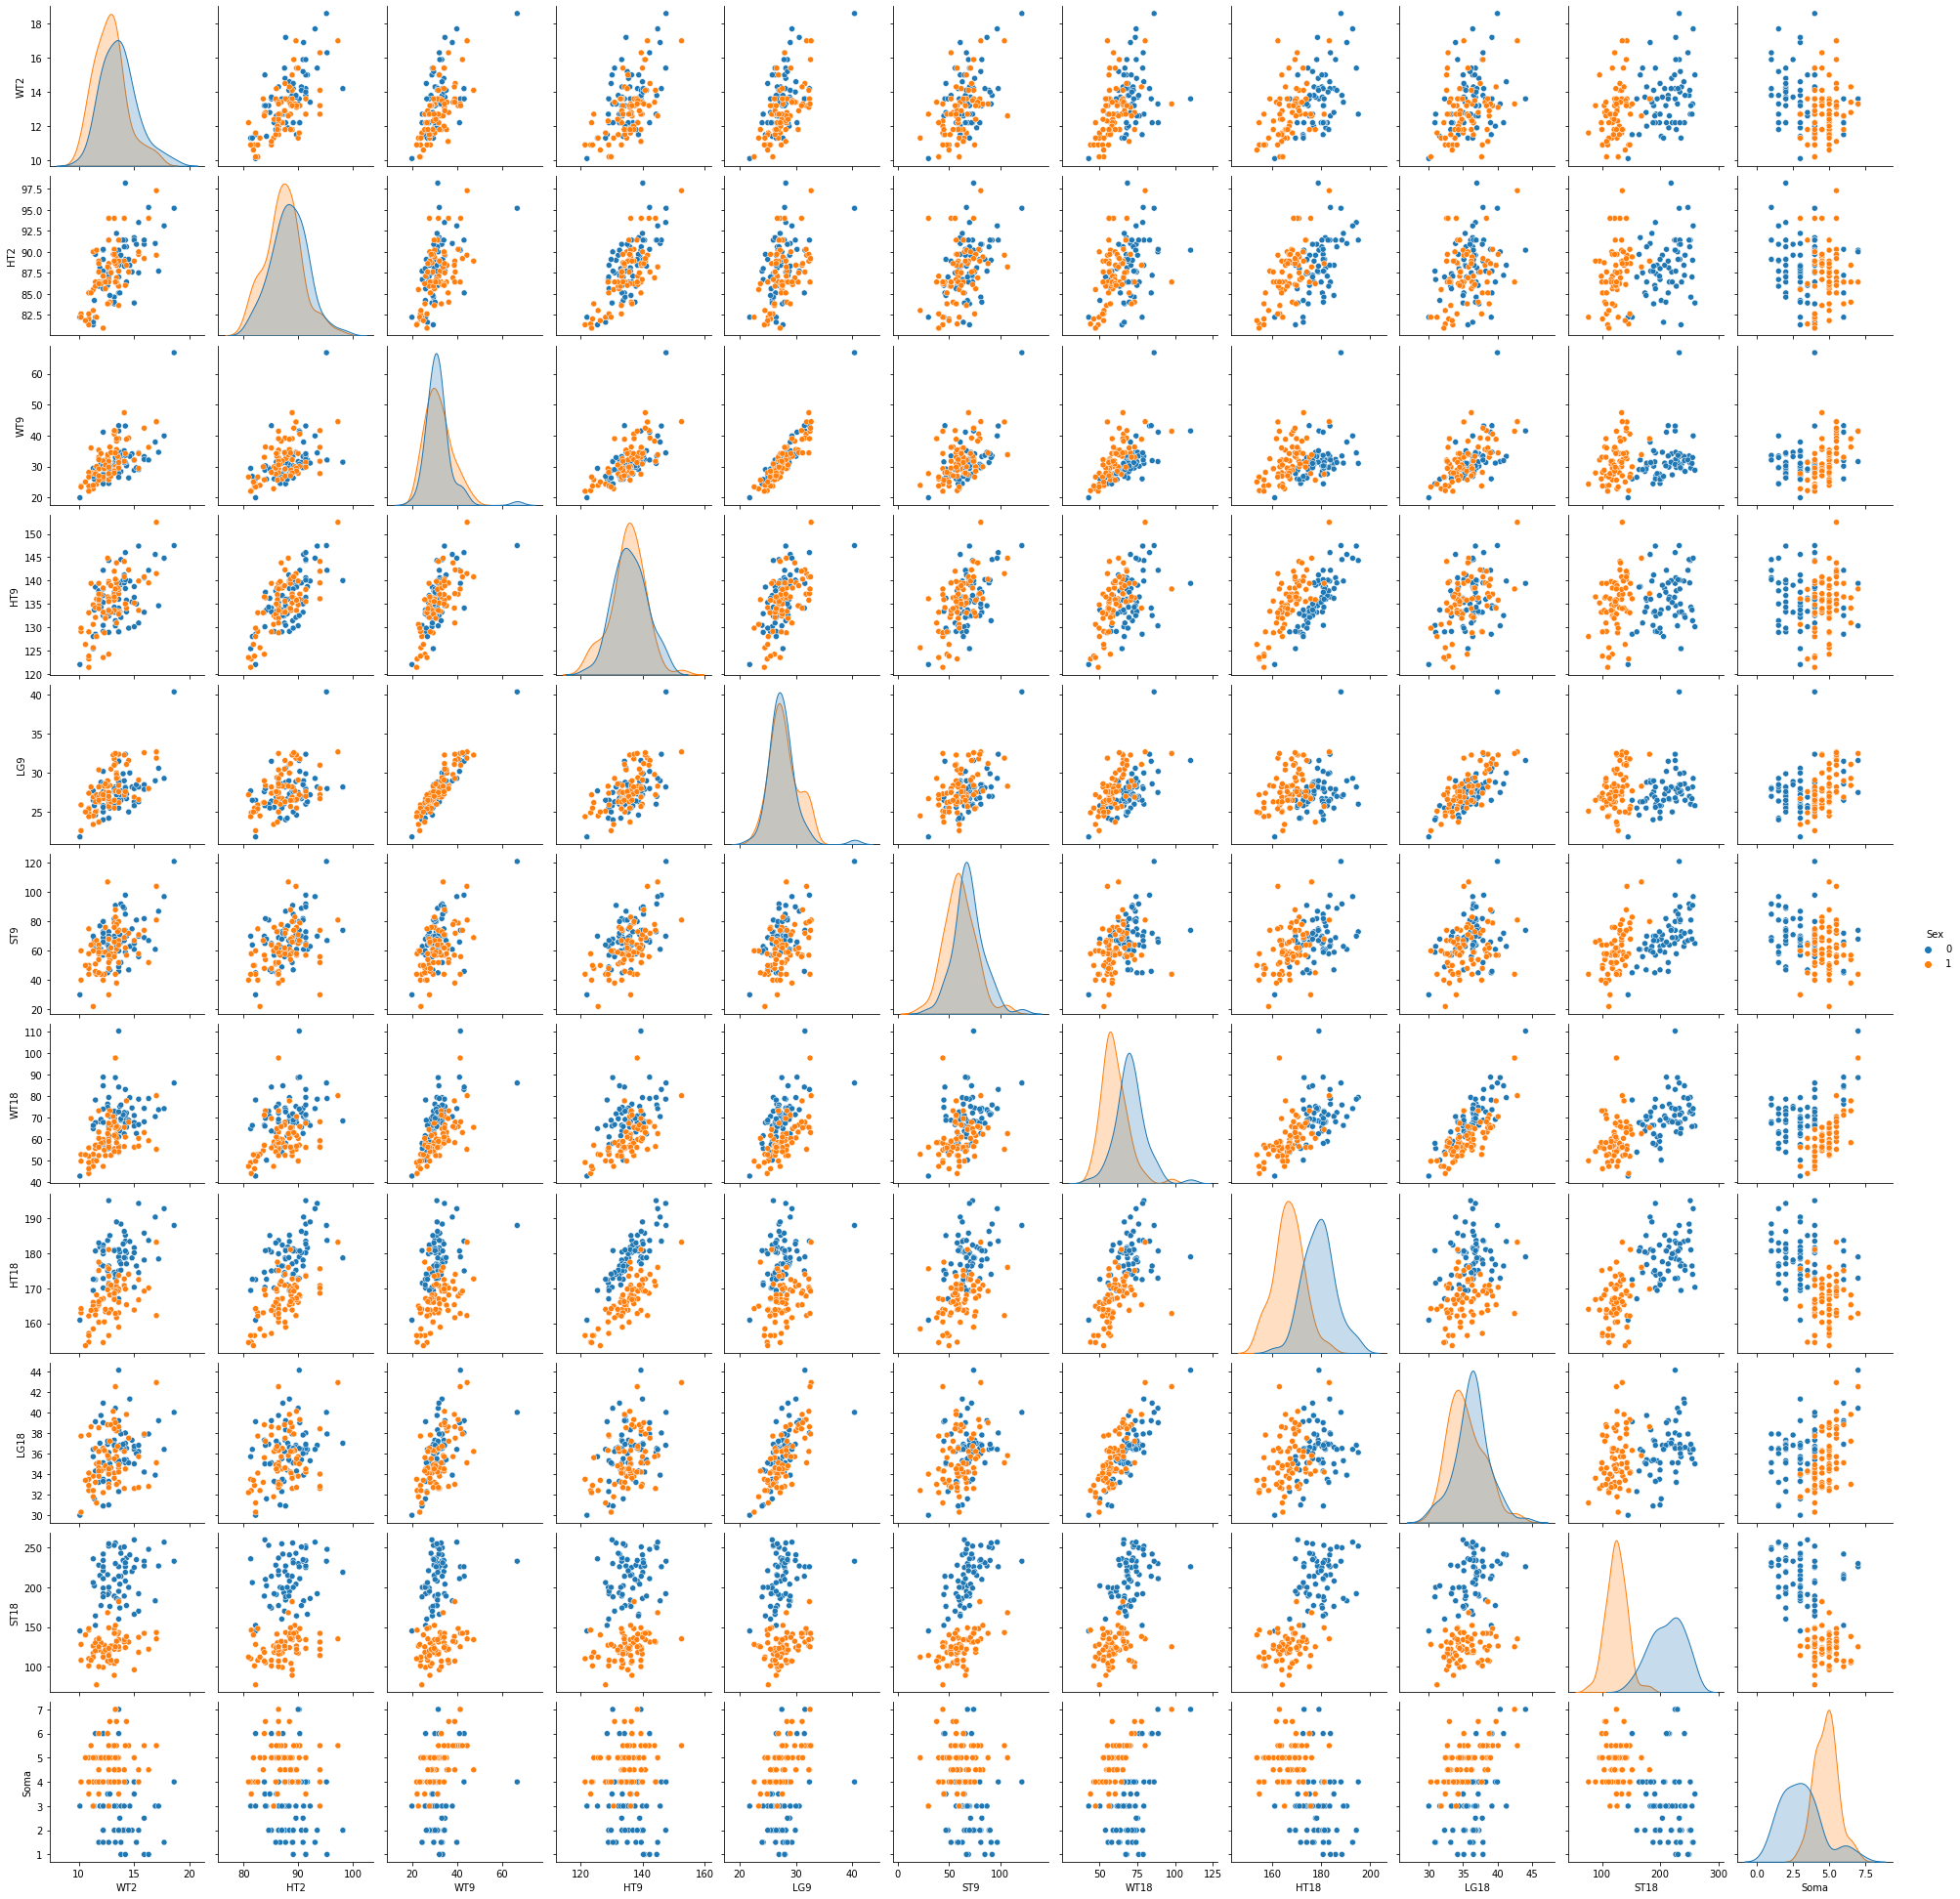

In [104]:
sns.pairplot(df1, hue='Sex', vars=['WT2','HT2','WT9','HT9','LG9','ST9','WT18','HT18','LG18','ST18','Soma'], kind='scatter')

In [105]:
df1.corr()

,Sex,WT2,HT2,WT9,HT9,LG9,ST9,WT18,HT18,LG18,ST18,Soma
Sex,1.000000,-0.252888,-0.166945,-0.000873,-0.070219,0.067498,-0.274942,-0.492535,-0.705263,-0.169566,-0.881280,0.589920
WT2,-0.252888,1.000000,0.639075,0.618971,0.560735,0.557934,0.490692,0.415594,0.486227,0.304775,0.342477,-0.187767
HT2,-0.166945,0.639075,1.000000,0.497948,0.721208,0.428037,0.436098,0.391417,0.548673,0.292372,0.275575,-0.175528
WT9,-0.000873,0.618971,0.497948,1.000000,0.687379,0.920384,0.496321,0.581461,0.313933,0.583699,0.152978,0.283327
HT9,-0.070219,0.560735,0.721208,0.687379,1.000000,0.573460,0.554554,0.499261,0.643219,0.400970,0.204624,-0.011632
LG9,0.067498,0.557934,0.428037,0.920384,0.573460,1.000000,0.466512,0.533041,0.199247,0.698216,0.100919,0.315344
ST9,-0.274942,0.490692,0.436098,0.496321,0.554554,0.466512,1.000000,0.359465,0.468112,0.310770,0.509682,-0.229507
WT18,-0.492535,0.415594,0.391417,0.581461,0.499261,0.533041,0.359465,1.000000,0.623539,0.793322,0.564008,0.118707
HT18,-0.705263,0.486227,0.548673,0.313933,0.643219,0.199247,0.468112,0.623539,1.000000,0.302476,0.708760,-0.460571
LG18,-0.169566,0.304775,0.292372,0.583699,0.400970,0.698216,0.310770,0.793322,0.302476,1.000000,0.291938,0.310978


There are 11 variables and 55 pairs in this scatter plot matrix. 

WT18 and LG18, WT9 and LG9 are the top 2 strongest relationships due to being more positively, linearly correlated with each other. WT18 and LG18 have a correlation value of 0.62. WT9 and LG9 have a correlation value of 0.92.

In most cases, Male height/weight values were higher than Female height/weight values. In the smaller age groups (WT2, HT2, WT9, and HT9), the data points were more closely together. As the age group increases (WT18, HT18), the matrix shows a larger separation between Male and Female values. This makes sense because as Males and Females age, we grow to our adult height, and the average adult Male is generally higher than the average adult Female.  

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
x1 = df1['HT18'][df1['Sex'] == 0].values.reshape(-1,1)
y1 = df1['WT18'][df1['Sex'] == 0].values
x2 = df1['HT18'][df1['Sex'] == 1].values.reshape(-1,1)
y2 = df1['WT18'][df1['Sex'] == 1].values

In [33]:
model1 = LinearRegression()
model2 = LinearRegression()
model1.fit(x1, y1)
model2.fit(x2, y2)

LinearRegression()

In [37]:
model1.coef_

array([0.6198886])

In [38]:
model2.coef_

array([0.71013741])

In [35]:
model1.intercept_

-40.681758928375345

In [39]:
model2.intercept_

-58.48504116383358

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WT18')

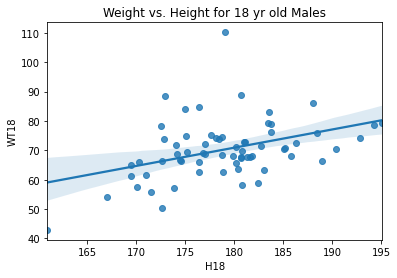

In [40]:
sns.regplot(x1,y1)

plt.title('Weight vs. Height for 18 yr old Males')
plt.xlabel('H18')
plt.ylabel('WT18')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'WT18')

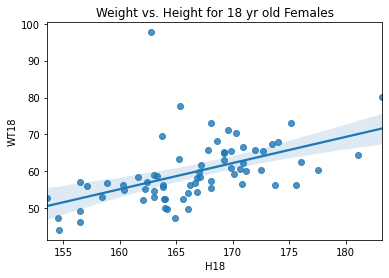

In [41]:
sns.regplot(x2,y2)

plt.title('Weight vs. Height for 18 yr old Females')
plt.xlabel('H18')
plt.ylabel('WT18')

The regression between both Male and Female visualizations are both positive, linear relationships.

We can model Weight vs. Height for 18 yr old Males:
WT18(Male) = 0.6198886 * HT18(Male) - 40.681758928375345

We can model Weight vs. Height for 18 yr old Females:
WT18(Female) = 0.71013741 * HT18(Female) - 58.48504116383358

## Question 2

In [53]:
X = df1[['HT2','WT2','HT9','WT9','ST9']]
Y = df1['WT18'].values

In [44]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [45]:
reg.coef_

array([0.15523652, 0.15692846, 0.25628245, 0.77361996, 0.02672126])

In [46]:
reg.intercept_

-11.748068143679745

This multiple linear regression to explain WT18 can be modeled as:

WT18 = - 11.75 + 0.16 * HT2 + 0.16 * WT2 + 0.26 * HT9 + 0.77 * WT9 + 0.03 * ST9 

The intercept was calculated to be = -11.748068143679745

The coefficient for each variable was calculated to be: 

HT2 = 0.15523652

WT2 = 0.15692846

HT9 = 0.25628245

WT9 = 0.77361996

ST9 = 0.02672126

In [55]:
import statsmodels.formula.api as sm
model = sm.ols(formula='Y ~ X', data=df1)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     14.64
Date:                Mon, 11 Jan 2021   Prob (F-statistic):           2.24e-11
Time:                        16:06:43   Log-Likelihood:                -484.13
No. Observations:                 136   AIC:                             980.3
Df Residuals:                     130   BIC:                             997.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.7481     25.091     -0.468      0.640     -61.387      37.891
X[0]           0.1552      0.359      0.433      0.666      -0.555       0.865
X[1]           0.1569      0.695      0.226      0.822      -1.218       1.532
X[2]           0.2563      0.244      1.050      0.296      -0.226       0.739
X[3]           0.7736      0.192      4.040      0.000       0.395       1.152
X[4]           0.0267      0.061      0.440      0.660      -0.093       0.147
==============================================================================
Omnibus:                       26.605   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.037
Skew:                           0.921   Prob(JB):                     1.66e-10
Kurtosis:                       5.134   Cond. No.                     5.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared: 0.360

F-test: 14.64

The R-squared value of 0.360 is considered weak coeficient of determination, and an F-test of 14.64 is considered a good value showing that this is statistically significant. 

The "WT9" variable is the strongest compared to the other variables because of its high t value (4.020) and strong p-value <0.001. 

In [60]:
import scipy.stats as stats
stats.ttest_ind(df1['WT18'], df1['HT2'])

Ttest_indResult(statistic=-23.889935596627865, pvalue=1.4954081412931758e-68)

The relationship between WT18 vs. HT2 has a calculated t-test of -23.89 and a p-value of <0.00001. 

This shows there is a statistically significant difference because of its t-test score and a p-value <0.05. 

Therefore, we can reject the null hypothesis (H0), and accept the alternative hypothesis (H1).

In [61]:
stats.ttest_ind(df1['WT18'], df1['WT2'])

Ttest_indResult(statistic=55.81216944207007, pvalue=2.8021125105452025e-150)

The relationship between WT18 vs. WT2 has a calculated t-test of 55.81 and a p-value of <0.00001. 

This shows there is a statistically significant difference because of its t-test score and a p-value <0.05. 

Therefore, we can reject the null hypothesis (H0), and accept the alternative hypothesis (H1).

In [62]:
stats.ttest_ind(df1['WT18'], df1['HT9'])

Ttest_indResult(statistic=-68.5964963503328, pvalue=7.232248428109443e-173)

The relationship between WT18 vs. HT9 has a calculated t-test of -68.60 and a p-value of <0.00001. 

This shows there is a statistically significant difference because of its t-test score and a p-value <0.05. 

Therefore, we can reject the null hypothesis (H0), and accept the alternative hypothesis (H1).

In [63]:
stats.ttest_ind(df1['WT18'], df1['WT9'])

Ttest_indResult(statistic=31.699889469248465, pvalue=5.404051365147391e-93)

The relationship between WT18 vs. WT9 has a calculated t-test of 31.70 and a pvalue of <0.00001. 

This is a good relationship because of its t-test score and a p-value <0.05. 

Therefore, we can reject the null hypothesis (H0), and accept the alternative hypothesis (H1).

In [124]:
stats.ttest_ind(df1['WT18'], df1['ST9'])

Ttest_indResult(statistic=0.1890581701158898, pvalue=0.850189260500006)

The relationship between WT18 vs. ST9 has a calculated t-test of 0.19 and a pvalue of 0.85. 

This shows there is NO statistically significant difference between the two variables because of its low t-test score and a p-value >0.05. 

Therefore, we have to ACCEPT the null hypothesis (H0), and reject the alternative hypothesis (H1). 

## Question 3

In [66]:
df3 = pd.read_csv("/Users/RyanPaw/ANA620/HW2_UN.csv")

In [67]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fertility     193 non-null    float64
 1   PPgdp         193 non-null    int64  
 2   LogFertility  193 non-null    float64
 3   LogPPgdp      193 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.2 KB


In [70]:
df3.head()

,Fertility,PPgdp,LogFertility,LogPPgdp
0,6.80,98,1.916923,4.584967
1,2.28,1317,0.824175,7.183112
2,2.80,1784,1.029619,7.486613
3,7.20,739,1.974081,6.605298
4,2.44,7163,0.891998,8.876684


In [89]:
X1 = df3['Fertility'].values.reshape(-1,1)
Y1 = df3['PPgdp'].values

In [90]:
reg1 = LinearRegression()
reg1.fit(X1, Y1)

LinearRegression()

In [91]:
reg1.coef_

array([-2530.25501105])

In [92]:
reg1.intercept_

14478.627342749554

Text(0, 0.5, 'PPgdp')

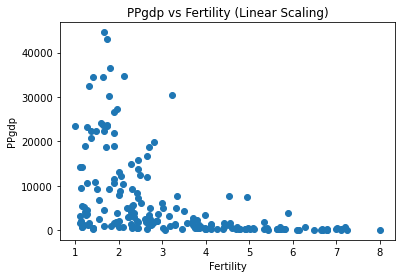

In [110]:
plt.scatter(X1, Y1)

plt.title('PPgdp vs Fertility (Linear Scaling)')
plt.xlabel('Fertility')
plt.ylabel("PPgdp")

Text(0, 0.5, 'PPgdp')

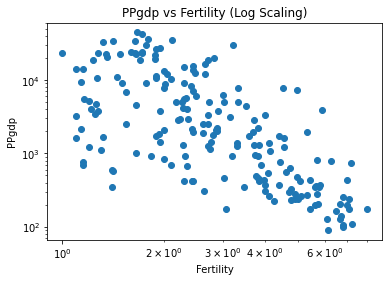

In [111]:
plt.scatter(X1, Y1)

plt.title('PPgdp vs Fertility (Log Scaling)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Fertility')
plt.ylabel("PPgdp")

## Question 4

In [95]:
X2 = df3['LogFertility'].values.reshape(-1,1)
Y2 = df3['LogPPgdp'].values

In [96]:
reg2 = LinearRegression()
reg2.fit(X2, Y2)

LinearRegression()

In [97]:
reg2.coef_

array([-2.0760859])

In [98]:
reg2.intercept_

9.733320970549073

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'LogPPgdp')

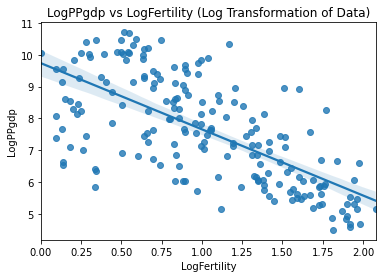

In [117]:
sns.regplot(X2, Y2)

plt.title('LogPPgdp vs LogFertility (Log Transformation of Data)')
plt.xlabel('LogFertility')
plt.ylabel("LogPPgdp")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'PPgdp')

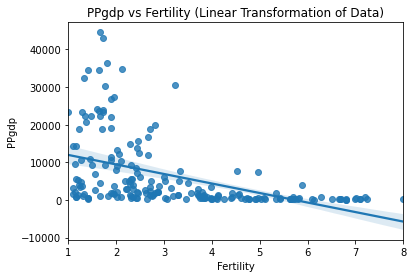

In [118]:
sns.regplot(X1, Y1)

plt.title('PPgdp vs Fertility (Linear Transformation of Data)')
plt.xlabel('Fertility')
plt.ylabel("PPgdp")

## Question 5

In [121]:
#Log Regression - Analysis of Variance (ANOVA) table 
model3 = sm.ols(formula='Y2 ~ X2', data=df3)
fitted3 = model3.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y2   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     162.1
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           2.73e-27
Time:                        14:11:29   Log-Likelihood:                -310.26
No. Observations:                 193   AIC:                             624.5
Df Residuals:                     191   BIC:                             631.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7333      0.188     51.891      0.000       9.363      10.103
X2            -2.0761      0.163    -12.734      0.000      -2.398      -1.754
==============================================================================
Omnibus:                        1.336   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.513   Jarque-Bera (JB):                1.244
Skew:                          -0.059   Prob(JB):                        0.537
Kurtosis:                       2.625   Cond. No.                         4.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
#Linear Regression - Analysis of Variance (ANOVA) table 
model4 = sm.ols(formula='Y1 ~ X1', data=df3)
fitted4 = model4.fit()
fitted4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Y1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     52.22
Date:                Thu, 14 Jan 2021   Prob (F-statistic):           1.15e-11
Time:                        14:11:51   Log-Likelihood:                -2015.2
No. Observations:                 193   AIC:                             4034.
Df Residuals:                     191   BIC:                             4041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e+04   1267.615     11.422      0.000     1.2e+04     1.7e+04
X1         -2530.2550    350.136     -7.226      0.000   -3220.885   -1839.625
==============================================================================
Omnibus:                       70.673   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.898
Skew:                           1.660   Prob(JB):                     2.11e-37
Kurtosis:                       6.160   Cond. No.                         8.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When comparing both Log vs. Linear tables above, the Log table has more favorable values.

The Log table has a higher F-statistic (162.1), compared to the Linear table (52.22), which shows that the Log data explains more variation. 

The Log table has a better Coefficient of Determination (R-squared) with a value of 0.459 (45.9%), compared to the Linear table with a value of 0.215 (21.5%). This shows more variance in our dependent variable can be explained in our independent variable.

Therefore, the log regression exhibits a better fit.